<a href="https://colab.research.google.com/github/D10752002/LSTM-Anomaly-detection/blob/main/LSTM_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nas.csv')
print(df.head())

         Date         Open         High          Low        Close  \
0  2017-07-24  6387.819824  6417.700195  6380.609863  6410.810059   
1  2017-07-25  6407.589844  6425.450195  6396.870117  6412.169922   
2  2017-07-26  6425.930176  6432.379883  6416.299805  6422.750000   
3  2017-07-27  6459.759766  6460.839844  6318.620117  6382.189941   
4  2017-07-28  6350.270020  6379.700195  6337.220215  6374.680176   

     Adj Close      Volume  
0  6410.810059  1735520000  
1  6412.169922  1925230000  
2  6422.750000  1988040000  
3  6382.189941  2483560000  
4  6374.680176  1860770000  


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

1207   2022-05-09
1208   2022-05-10
1209   2022-05-11
1210   2022-05-12
1211   2022-05-13
1212   2022-05-16
1213   2022-05-17
1214   2022-05-18
1215   2022-05-19
1216   2022-05-20
1217   2022-05-23
1218   2022-05-24
1219   2022-05-25
1220   2022-05-26
1221   2022-05-27
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:5]
print(cols) #['Open', 'High', 'Low', 'Close']

['Open', 'High', 'Low', 'Close']


In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

n_future = 1  
n_past = 5 

#shape: (num_samples x timesteps x n_features)

for i in range(n_past, len(df_for_training_scaled) ):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (1217, 5, 4).
trainY shape == (1217, 1).


In [ ]:
# Model architecture

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model fitting
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/30
69/69 [==============================] - 4s 14ms/step - loss: 0.2143 - val_loss: 0.0884
Epoch 2/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0391 - val_loss: 0.0223
Epoch 3/30
69/69 [==============================] - 1s 9ms/step - loss: 0.0313 - val_loss: 0.0186
Epoch 4/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0317 - val_loss: 0.0157
Epoch 5/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0285 - val_loss: 0.0148
Epoch 6/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0288 - val_loss: 0.0153
Epoch 7/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0250 - val_loss: 0.0126
Epoch 8/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0300 - val_loss: 0.0243
Epoch 9/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0308 - val_loss: 0.0280
Epoch 10/30
69/69 [==============================] - 1s 8ms/step - loss: 0.0301 - val_loss: 0.0210
Epoch 11/30
69/69 

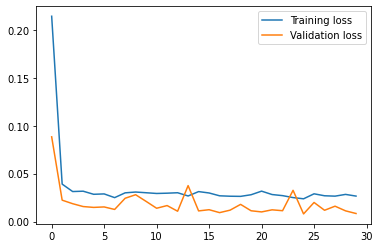

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [ ]:
trainZ = []
for i in range(n_past, len(df_for_training_scaled) ):
    trainZ.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    

trainZ = np.array(trainZ)

print('trainZ shape == {}.'.format(trainZ.shape))

trainZ shape == (1217, 5, 4).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/nasdaq.csv')
train_dates1 = pd.to_datetime(df1['Date'])
print(train_dates1)

0      2017-07-24
1      2017-07-25
2      2017-07-26
3      2017-07-27
4      2017-07-28
          ...    
1253   2022-07-15
1254   2022-07-18
1255   2022-07-19
1256   2022-07-20
1257   2022-07-21
Name: Date, Length: 1258, dtype: datetime64[ns]


In [ ]:
#Predictions
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_days_for_prediction=30  #last 30 days

predict_period_dates = pd.date_range(list(train_dates1[:-30])[-1], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-06-07 00:00:00', freq='C'), Timestamp('2022-06-08 00:00:00', freq='C'), Timestamp('2022-06-09 00:00:00', freq='C'), Timestamp('2022-06-10 00:00:00', freq='C'), Timestamp('2022-06-13 00:00:00', freq='C'), Timestamp('2022-06-14 00:00:00', freq='C'), Timestamp('2022-06-15 00:00:00', freq='C'), Timestamp('2022-06-16 00:00:00', freq='C'), Timestamp('2022-06-17 00:00:00', freq='C'), Timestamp('2022-06-20 00:00:00', freq='C'), Timestamp('2022-06-21 00:00:00', freq='C'), Timestamp('2022-06-22 00:00:00', freq='C'), Timestamp('2022-06-23 00:00:00', freq='C'), Timestamp('2022-06-24 00:00:00', freq='C'), Timestamp('2022-06-27 00:00:00', freq='C'), Timestamp('2022-06-28 00:00:00', freq='C'), Timestamp('2022-06-29 00:00:00', freq='C'), Timestamp('2022-06-30 00:00:00', freq='C'), Timestamp('2022-07-01 00:00:00', freq='C'), Timestamp('2022-07-05 00:00:00', freq='C'), Timestamp('2022-07-06 00:00:00', freq='C'), Timestamp('2022-07-07 00:00:00', freq='C'), Timestamp('2022-07-08 00:00:00'

In [ ]:
model.save_weights("lstm.h5")

In [ ]:
df_for_training1 = df1[cols].astype(float)

In [ ]:
#normalize
scaler1 = StandardScaler()
scaler1 = scaler1.fit(df_for_training1)
df_for_training_scaled1 = scaler1.transform(df_for_training1)

In [ ]:
trainZ1 = []
pred=[]
for i in range(n_past, len(df_for_training_scaled1) ):
    pred.append(df_for_training_scaled1[i + n_future - 1:i + n_future, 0])
    trainZ1.append(df_for_training_scaled1[i - n_past:i, 0:df_for_training1.shape[1]])

trainZ1 = np.array(trainZ1)
pred = np.array(pred)

print('trainZ1 shape == {}.'.format(trainZ1.shape))
print('pred shape == {}.'.format(pred.shape))



trainZ1 shape == (1253, 5, 4).
pred shape == (1253, 1).


In [ ]:
#Make predictions
prediction = model.predict(trainZ1[-n_days_for_prediction:]) 

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

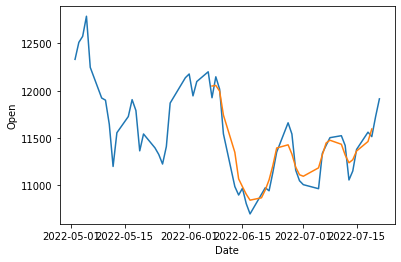

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df1[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

(array([ 71.,  93.,  82.,  98., 134., 127., 121., 137.,  95.,  69.,  39.,
         39.,  17.,  24.,  17.,  21.,  11.,   3.,   2.,   3.,   3.,   1.,
          1.,   2.,   0.,   2.,   4.,   0.,   0.,   1.]),
 array([1.68774801e-04, 8.55864255e-03, 1.69485103e-02, 2.53383780e-02,
        3.37282458e-02, 4.21181135e-02, 5.05079813e-02, 5.88978490e-02,
        6.72877168e-02, 7.56775845e-02, 8.40674523e-02, 9.24573200e-02,
        1.00847188e-01, 1.09237056e-01, 1.17626923e-01, 1.26016791e-01,
        1.34406659e-01, 1.42796526e-01, 1.51186394e-01, 1.59576262e-01,
        1.67966130e-01, 1.76355997e-01, 1.84745865e-01, 1.93135733e-01,
        2.01525601e-01, 2.09915468e-01, 2.18305336e-01, 2.26695204e-01,
        2.35085072e-01, 2.43474939e-01, 2.51864807e-01]),
 <a list of 30 Patch objects>)

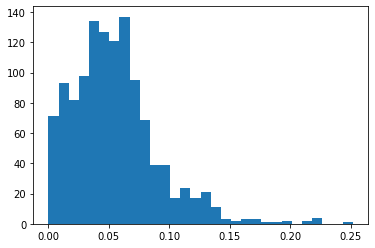

In [ ]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainY), axis=1)
plt.hist(trainMAE, bins=30)

In [ ]:
max_trainMAE = 0.15

(array([3., 2., 2., 3., 2., 1., 4., 2., 1., 2., 3., 0., 0., 0., 1., 1., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.01393199, 0.02219407, 0.03045615, 0.03871822, 0.0469803 ,
        0.05524238, 0.06350446, 0.07176654, 0.08002862, 0.08829069,
        0.09655277, 0.10481485, 0.11307693, 0.12133901, 0.12960108,
        0.13786316, 0.14612524, 0.15438732, 0.1626494 , 0.17091147,
        0.17917355, 0.18743563, 0.19569771, 0.20395979, 0.21222187,
        0.22048394, 0.22874602, 0.2370081 , 0.24527018, 0.25353226,
        0.26179433]),
 <a list of 30 Patch objects>)

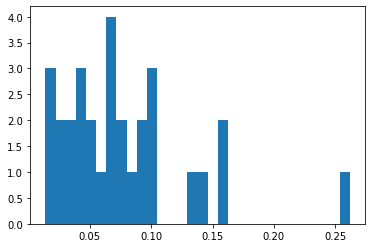

In [ ]:
testMAE = np.mean(np.abs(prediction - pred[-n_days_for_prediction:]), axis=1)
plt.hist(testMAE, bins=30)

In [ ]:
anomaly_df = pd.DataFrame(pred[-n_days_for_prediction:])
train_dates1 = np.array(train_dates1)
anomaly_df['Date'] = train_dates1[-n_days_for_prediction:]
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['Open'] = y_pred_future
print(anomaly_df['Date'])

0    2022-06-08
1    2022-06-09
2    2022-06-10
3    2022-06-13
4    2022-06-14
5    2022-06-15
6    2022-06-16
7    2022-06-17
8    2022-06-21
9    2022-06-22
10   2022-06-23
11   2022-06-24
12   2022-06-27
13   2022-06-28
14   2022-06-29
15   2022-06-30
16   2022-07-01
17   2022-07-05
18   2022-07-06
19   2022-07-07
20   2022-07-08
21   2022-07-11
22   2022-07-12
23   2022-07-13
24   2022-07-14
25   2022-07-15
26   2022-07-18
27   2022-07-19
28   2022-07-20
29   2022-07-21
Name: Date, dtype: datetime64[ns]


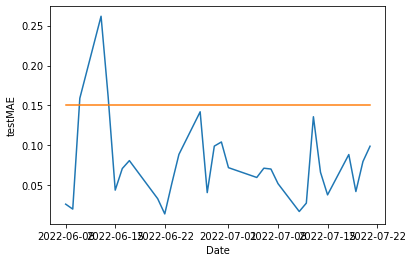

In [ ]:
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_trainMAE'])

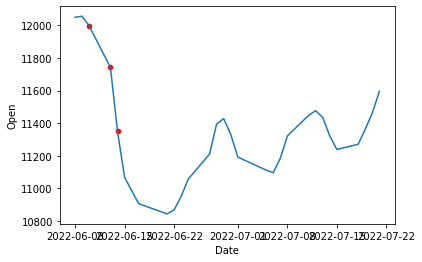

In [ ]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

#Plot anomalies
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['Open'])
sns.scatterplot(x=anomalies['Date'], y=anomalies['Open'], color='r')